# Important Update
In the free tier the use of collection feature is disabled. Therefore, for using this notebook for managing collections a paid Pinecone tire should be used. [Reference]([https://docs.pinecone.io/docs/starter-environment#collections)
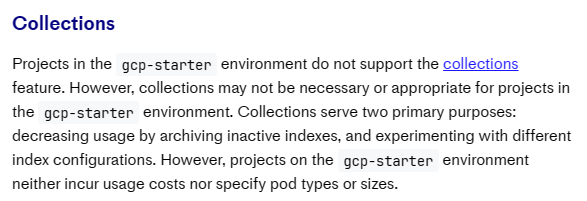

# Index Backup Using Collection

###### 1. Initialize Pinecone and Create index     
###### 2. Upsert Sparse-Dense Vectors
###### 3. Create Collection
###### 4. List, Describe & Delete Collection
###### 5. Create Index from Collection


In [2]:
import pinecone
from tqdm.autonotebook import tqdm

# API_KEY = "YOUR API KEY"
# ENV = "YOUR ENVIRONMENT"

pinecone.init(api_key = API_KEY, environment = ENV)

<!-- #     ("A", [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
#     ("B", [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]),
#     ("C", [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]),
#     ("D", [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]),
#     ("E", [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) -->

In [31]:
# If you have already an existing index run the next line to delete it first due to the limitation of free tier
# pinecone.delete_index('test') 
pinecone.create_index('test', dimension=3, 
                      metric='dotproduct', pod_type = 's1')

# metric should be dotproduct and pod_type s1/p1 for sparse-dense upsert
# index dimension is equal to dimension of dense vector

In [4]:
# creating a collection

pinecone.create_collection(name = "my-collection", source = "test")

In [5]:
# list all collections in database

pinecone.list_collections()

['my-collection']

In [7]:
# describe a collection

res = pinecone.describe_collection("my-collection") # response

In [14]:
res.name

'my-collection'

In [12]:
res.size / 10**6  # Mega Bytes

3.112836

In [15]:
pinecone.delete_collection("my-collection") 
# wait till index creation completed and populated, takes 10 mins or less